In [25]:
from PIL import Image
import numpy as np
import pandas as pd
import random
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

# CNN

In [26]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [27]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 740


In [28]:
#Normalise images
images = np.array(images)
images = images[:,30:]
images /= 255.0

In [29]:
#convert datas to dummyvalues
labels_loc = np.array(pd.get_dummies(labels_loc))

(array([0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 (66, 160, 3))

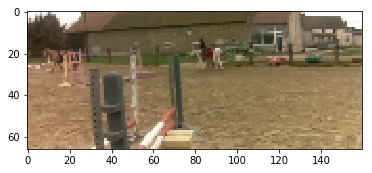

In [30]:
labels_loc[42], plt.imshow(images[42]), images[42].shape

In [31]:
#from keras.models import load_model
#model = load_model("model.h5")

In [32]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=images[0].shape, name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
#x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
#x = BatchNormalization()(x)
#x = Activation("relu")(x)
#x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 66, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 14, 37, 4)         0         
__________

In [33]:
model_name="model_CNN.h5"

In [34]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [35]:
h = model.fit(images, labels_loc, batch_size=64, epochs=50, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 592 samples, validate on 148 samples
Epoch 1/50
592/592 [==============================] - 4s 6ms/step - loss: 2.2486 - acc: 0.1537 - val_loss: 1.6185 - val_acc: 0.3919

Epoch 00001: val_loss improved from inf to 1.61850, saving model to model_CNN.h5
Epoch 2/50
592/592 [==============================] - 3s 5ms/step - loss: 1.7864 - acc: 0.3091 - val_loss: 3.7066 - val_acc: 0.2568

Epoch 00002: val_loss did not improve
Epoch 3/50
592/592 [==============================] - 2s 4ms/step - loss: 1.4729 - acc: 0.4358 - val_loss: 1.8185 - val_acc: 0.3919

Epoch 00003: val_loss did not improve
Epoch 4/50
592/592 [==============================] - 3s 5ms/step - loss: 1.2937 - acc: 0.5135 - val_loss: 1.5773 - val_acc: 0.4662

Epoch 00004: val_loss improved from 1.61850 to 1.57725, saving model to model_CNN.h5
Epoch 5/50
592/592 [==============================] - 3s 4ms/step - loss: 1.1310 - acc: 0.5946 - val_loss: 1.7828 - val_acc: 0.2162

Epoch 00005: val_loss did not improve
Epoch 6/5

592/592 [==============================] - 3s 5ms/step - loss: 0.1992 - acc: 0.9392 - val_loss: 3.1799 - val_acc: 0.5878

Epoch 00046: val_loss did not improve
Epoch 47/50
592/592 [==============================] - 3s 5ms/step - loss: 0.1599 - acc: 0.9443 - val_loss: 0.4297 - val_acc: 0.8581

Epoch 00047: val_loss did not improve
Epoch 48/50
592/592 [==============================] - 3s 5ms/step - loss: 0.1355 - acc: 0.9662 - val_loss: 2.3790 - val_acc: 0.4595

Epoch 00048: val_loss did not improve
Epoch 49/50
592/592 [==============================] - 3s 5ms/step - loss: 0.1331 - acc: 0.9611 - val_loss: 2.3618 - val_acc: 0.4459

Epoch 00049: val_loss did not improve
Epoch 50/50
592/592 [==============================] - 3s 5ms/step - loss: 0.1211 - acc: 0.9662 - val_loss: 10.0239 - val_acc: 0.1959

Epoch 00050: val_loss did not improve


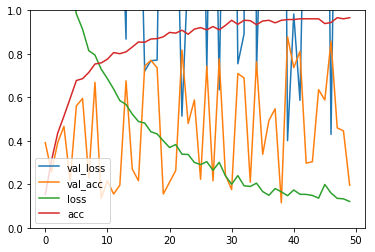

In [36]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

## RNN

In [37]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    for name in sorted(dir_list, key=lambda name : name.split("_")[1].split(".png")[0]):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [38]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 740


In [39]:
#Normalise images
images = np.array(images)
images = images[:,30:]
images /= 255.0

In [40]:
win_size = 2

images_seq = []
labels_loc_seq =[]

for i, image in enumerate(images):
    if len(images) > i + win_size:
        images_seq.append(images[i:i + win_size])
        
for i, label_loc in enumerate(labels_loc):
    if len(labels_loc) > i + win_size:
        labels_loc_seq.append(labels_loc[i+win_size-1])  

In [41]:
c = list(zip(images_seq, labels_loc_seq))
random.shuffle(c)
images_seq, labels_loc_seq = zip(*c)

In [42]:
images_seq = np.array(images_seq)
labels_loc_seq = np.array(pd.get_dummies(labels_loc_seq))

array([0, 1, 0, 0, 0, 0, 0], dtype=uint8)

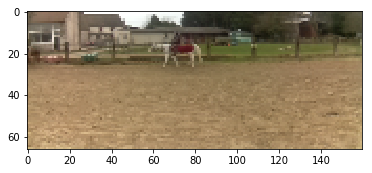

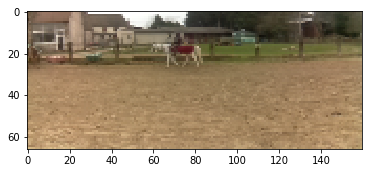

In [43]:
for image in images_seq[42]:
    fig, axes = plt.subplots()
    axes.imshow(image)
labels_loc_seq[42]

In [44]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=images_seq[0].shape, name='img_in')
x = img_in

x = TimeDistributed(Convolution2D(2, (5,5), strides=(2,2), use_bias=False))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = TimeDistributed(Convolution2D(4, (5,5), strides=(2,2), use_bias=False))(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)

x = TimeDistributed(Flatten(name='flattened'))(x)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc_seq.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 2, 66, 160, 3)     0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 31, 78, 2)      150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 31, 78, 2)      8         
_________________________________________________________________
activation_1 (Activation)    (None, 2, 31, 78, 2)      0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 14, 37, 4)      200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 14, 37, 4)      16        
_________________________________________________________________
activation_2 (Activation)    (None, 2, 14, 37, 4)      0         
__________

In [45]:
model_name="model_RNN.h5"

In [46]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [47]:
h = model.fit(images_seq, labels_loc_seq, batch_size=16, epochs=50, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 590 samples, validate on 148 samples
Epoch 1/50
590/590 [==============================] - 7s 13ms/step - loss: 2.0483 - acc: 0.2559 - val_loss: 2.2239 - val_acc: 0.0811

Epoch 00001: val_loss improved from inf to 2.22393, saving model to model_RNN.h5
Epoch 2/50
590/590 [==============================] - 5s 9ms/step - loss: 1.5968 - acc: 0.3949 - val_loss: 2.0682 - val_acc: 0.4392

Epoch 00002: val_loss improved from 2.22393 to 2.06823, saving model to model_RNN.h5
Epoch 3/50
590/590 [==============================] - 6s 10ms/step - loss: 1.3541 - acc: 0.4864 - val_loss: 1.1935 - val_acc: 0.4932

Epoch 00003: val_loss improved from 2.06823 to 1.19355, saving model to model_RNN.h5
Epoch 4/50
590/590 [==============================] - 6s 10ms/step - loss: 1.3114 - acc: 0.5051 - val_loss: 1.4872 - val_acc: 0.3581

Epoch 00004: val_loss did not improve
Epoch 5/50
590/590 [==============================] - 6s 10ms/step - loss: 1.0355 - acc: 0.6390 - val_loss: 1.0042 - val_acc: 0.54

590/590 [==============================] - 6s 10ms/step - loss: 0.0769 - acc: 0.9729 - val_loss: 0.1896 - val_acc: 0.9459

Epoch 00044: val_loss did not improve
Epoch 45/50
590/590 [==============================] - 6s 10ms/step - loss: 0.0760 - acc: 0.9814 - val_loss: 0.2302 - val_acc: 0.9392

Epoch 00045: val_loss did not improve
Epoch 46/50
590/590 [==============================] - 6s 11ms/step - loss: 0.0540 - acc: 0.9831 - val_loss: 0.2297 - val_acc: 0.9392

Epoch 00046: val_loss did not improve
Epoch 47/50
590/590 [==============================] - 6s 10ms/step - loss: 0.1095 - acc: 0.9746 - val_loss: 0.1978 - val_acc: 0.9459

Epoch 00047: val_loss did not improve
Epoch 48/50
590/590 [==============================] - 6s 10ms/step - loss: 0.0460 - acc: 0.9847 - val_loss: 0.1821 - val_acc: 0.9459

Epoch 00048: val_loss did not improve
Epoch 49/50
590/590 [==============================] - 6s 10ms/step - loss: 0.0802 - acc: 0.9780 - val_loss: 0.1917 - val_acc: 0.9527

Epoch 00049:

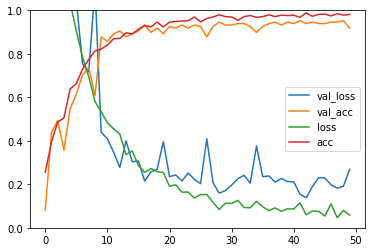

In [48]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))